
# Home Credit Default Risk Prediction

Proyek ini bertujuan untuk memprediksi apakah seorang peminjam akan gagal bayar atau tidak berdasarkan data historis. Proyek mencakup tahap eksplorasi data, feature engineering, modeling, dan evaluasi model.


# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
import pandas as pd

# Dataset utama
app_train = pd.read_csv('/content/drive/MyDrive/rakamin/application_train.csv')
app_test = pd.read_csv('/content/drive/MyDrive/rakamin/application_test.csv')

# Riwayat kredit dari lembaga lain
bureau = pd.read_csv('/content/drive/MyDrive/rakamin/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/rakamin/bureau_balance.csv')

# Riwayat aplikasi pinjaman sebelumnya ke Home Credit
previous_application = pd.read_csv('/content/drive/MyDrive/rakamin/previous_application.csv')
pos_cash_balance = pd.read_csv('/content/drive/MyDrive/rakamin/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('/content/drive/MyDrive/rakamin/credit_card_balance.csv')
installments_payments = pd.read_csv('/content/drive/MyDrive/rakamin/installments_payments.csv')

# Deskripsi kolom
columns_desc = pd.read_csv('/content/drive/MyDrive/rakamin/HomeCredit_columns_description (1).csv', encoding='latin-1')
sample_submission = pd.read_csv('/content/drive/MyDrive/rakamin/sample_submission (1).csv')

In [12]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AVG_PREV_CREDIT_AMT,NUM_PREV_REFUSED,NUM_INSTALLMENTS,AVG_INST_DUE,AVG_INST_ENTRY,AVG_PAYMENT,POS_MONTHS_BAL,POS_CNT_INST,MEAN_CC_BALANCE,MEAN_CC_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,179055.00,0.0,19.0,-295.000000,-315.421053,11559.247105,-10.000000,24.000000,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,484191.00,0.0,25.0,-1378.160000,-1385.320000,64754.586000,-43.785714,10.107143,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,20106.00,0.0,3.0,-754.000000,-761.666667,7096.155000,-25.500000,3.750000,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,291695.50,1.0,16.0,-252.250000,-271.625000,62947.088438,-9.619048,12.000000,0.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,166638.75,0.0,66.0,-1028.606061,-1032.242424,12214.060227,-33.636364,15.333333,NaN,NaN


In [13]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,BUREAU_MONTHS_COUNT
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN


In [15]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [16]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [18]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [19]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [20]:
columns_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [21]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


# EDA

In [38]:
print("Ukuran data:", app_train.shape)
app_train.head()

Ukuran data: (307511, 139)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AVG_PREV_CREDIT_AMT,NUM_PREV_REFUSED,NUM_INSTALLMENTS,AVG_INST_DUE,AVG_INST_ENTRY,AVG_PAYMENT,POS_MONTHS_BAL,POS_CNT_INST,MEAN_CC_BALANCE,MEAN_CC_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,179055.00,0.0,19.0,-295.000000,-315.421053,11559.247105,-10.000000,24.000000,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,484191.00,0.0,25.0,-1378.160000,-1385.320000,64754.586000,-43.785714,10.107143,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,20106.00,0.0,3.0,-754.000000,-761.666667,7096.155000,-25.500000,3.750000,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,291695.50,1.0,16.0,-252.250000,-271.625000,62947.088438,-9.619048,12.000000,0.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,166638.75,0.0,66.0,-1028.606061,-1032.242424,12214.060227,-33.636364,15.333333,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 139 entries, SK_ID_CURR to MEAN_CC_PAYMENT
dtypes: float64(82), int64(41), object(16)
memory usage: 326.1+ MB
None
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


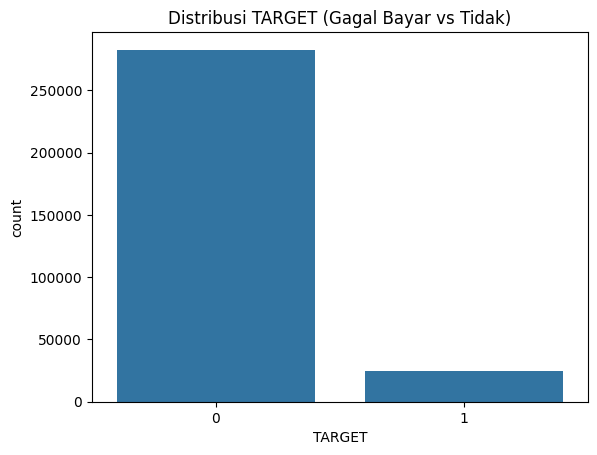

In [39]:
print(app_train.info())
print(app_train['TARGET'].value_counts(normalize=True))
sns.countplot(data=app_train, x='TARGET')
plt.title('Distribusi TARGET (Gagal Bayar vs Tidak)')
plt.show()

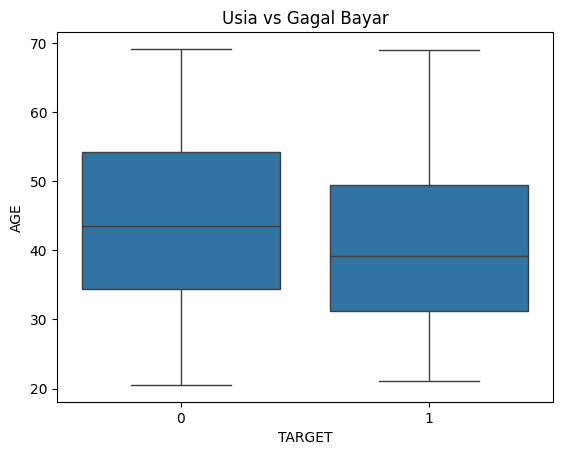

In [40]:
app_train['AGE'] = app_train['DAYS_BIRTH'] / -365
sns.boxplot(data=app_train, x='TARGET', y='AGE')
plt.title('Usia vs Gagal Bayar')
plt.show()

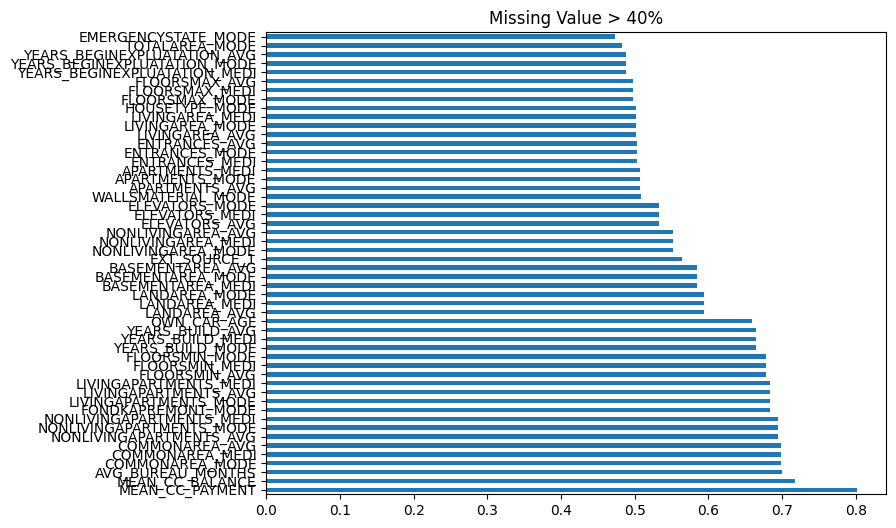

In [41]:
missing = app_train.isnull().mean().sort_values(ascending=False)
missing[missing > 0.4].plot(kind='barh', figsize=(8, 6), title='Missing Value > 40%')
plt.show()

In [42]:
corr = app_train.corr(numeric_only=True)['TARGET'].sort_values(key=abs, ascending=False)
print("Top korelasi dengan TARGET:")
print(corr.head(10))

Top korelasi dengan TARGET:
TARGET                         1.000000
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
MEAN_CC_BALANCE                0.087177
AVG_BUREAU_MONTHS             -0.080193
AGE                           -0.078239
DAYS_BIRTH                     0.078239
NUM_PREV_REFUSED               0.064469
REGION_RATING_CLIENT_W_CITY    0.060893
Name: TARGET, dtype: float64


# Feature Engineering

In [4]:

app_train['AGE'] = app_train['DAYS_BIRTH'] / -365
app_train['CREDIT_INCOME_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_RATIO'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']


In [5]:

bb_agg = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].count().reset_index()
bb_agg.columns = ['SK_ID_BUREAU', 'BUREAU_MONTHS_COUNT']
bureau = bureau.merge(bb_agg, on='SK_ID_BUREAU', how='left')
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': 'sum',
    'AMT_CREDIT_SUM_DEBT': 'sum',
    'BUREAU_MONTHS_COUNT': 'mean'
}).reset_index()
bureau_agg.columns = ['SK_ID_CURR', 'TOTAL_CREDIT_BUREAU', 'TOTAL_DEBT_BUREAU', 'AVG_BUREAU_MONTHS']
app_train = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')


In [6]:

prev_agg = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean',
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Refused').sum()
}).reset_index()
prev_agg.columns = ['SK_ID_CURR', 'AVG_PREV_APP_AMT', 'AVG_PREV_CREDIT_AMT', 'NUM_PREV_REFUSED']
app_train = app_train.merge(prev_agg, on='SK_ID_CURR', how='left')


In [7]:

inst_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_VERSION': 'count',
    'DAYS_INSTALMENT': 'mean',
    'DAYS_ENTRY_PAYMENT': 'mean',
    'AMT_PAYMENT': 'mean'
}).reset_index()
inst_agg.columns = ['SK_ID_CURR', 'NUM_INSTALLMENTS', 'AVG_INST_DUE', 'AVG_INST_ENTRY', 'AVG_PAYMENT']
app_train = app_train.merge(inst_agg, on='SK_ID_CURR', how='left')


In [8]:

pos_agg = pos_cash_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': 'mean',
    'CNT_INSTALMENT': 'mean'
}).reset_index()
pos_agg.columns = ['SK_ID_CURR', 'POS_MONTHS_BAL', 'POS_CNT_INST']
app_train = app_train.merge(pos_agg, on='SK_ID_CURR', how='left')


In [9]:

cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': 'mean',
    'AMT_PAYMENT_CURRENT': 'mean'
}).reset_index()
cc_agg.columns = ['SK_ID_CURR', 'MEAN_CC_BALANCE', 'MEAN_CC_PAYMENT']
app_train = app_train.merge(cc_agg, on='SK_ID_CURR', how='left')


# Logistic Regression

In [22]:
features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE',
            'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO',
            'TOTAL_CREDIT_BUREAU', 'TOTAL_DEBT_BUREAU', 'AVG_BUREAU_MONTHS',
            'AVG_PREV_APP_AMT', 'AVG_PREV_CREDIT_AMT', 'NUM_PREV_REFUSED',
            'NUM_INSTALLMENTS', 'AVG_INST_DUE', 'AVG_INST_ENTRY', 'AVG_PAYMENT',
            'POS_MONTHS_BAL', 'POS_CNT_INST', 'MEAN_CC_BALANCE', 'MEAN_CC_PAYMENT']

X = app_train[features]
y = app_train['TARGET']
X = X.fillna(X.median())

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Logistic Regression dengan class_weight
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_valid_scaled)
y_proba_lr = lr.predict_proba(X_valid_scaled)[:, 1]

print("Logistic Regression")
print(confusion_matrix(y_valid, y_pred_lr))
print(classification_report(y_valid, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_valid, y_proba_lr))

Logistic Regression
[[34860 21678]
 [ 1983  2982]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     56538
           1       0.12      0.60      0.20      4965

    accuracy                           0.62     61503
   macro avg       0.53      0.61      0.47     61503
weighted avg       0.88      0.62      0.70     61503

ROC AUC Score: 0.6452883973231276


# Random Forest

In [23]:
# Random Forest dengan class_weight
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)
y_proba_rf = rf.predict_proba(X_valid)[:, 1]

print("Random Forest")
print(confusion_matrix(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_valid, y_proba_rf))

Random Forest
[[56531     7]
 [ 4962     3]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.30      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.61      0.50      0.48     61503
weighted avg       0.87      0.92      0.88     61503

ROC AUC Score: 0.651259413724078


# XGBoost

## XGBoost 74%

In [24]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_valid)
print(classification_report(y_valid, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     56538
           1       0.15      0.48      0.23      4965

    accuracy                           0.74     61503
   macro avg       0.55      0.62      0.54     61503
weighted avg       0.88      0.74      0.80     61503



## XGBoost 27% (failed)


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=11,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)
xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=30, verbose=False)

# Threshold tuning
y_proba_xgb = xgb.predict_proba(X_valid)[:, 1]
y_pred_thresh_xgb = (y_proba_xgb >= 0.3).astype(int)

print(confusion_matrix(y_valid, y_pred_thresh_xgb))
print(classification_report(y_valid, y_pred_thresh_xgb))
print("ROC AUC:", roc_auc_score(y_valid, y_proba_xgb))

[[12220 44318]
 [  378  4587]]
              precision    recall  f1-score   support

           0       0.97      0.22      0.35     56538
           1       0.09      0.92      0.17      4965

    accuracy                           0.27     61503
   macro avg       0.53      0.57      0.26     61503
weighted avg       0.90      0.27      0.34     61503

ROC AUC: 0.6908932035016633


## XgBoost 63%

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_proba_xgb)

# Cari threshold yang paling balance antara recall dan false positive rate
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold optimal:", optimal_threshold)

# Prediksi ulang pakai threshold itu
y_pred_opt = (y_proba_xgb >= optimal_threshold).astype(int)

print(confusion_matrix(y_valid, y_pred_opt))
print(classification_report(y_valid, y_pred_opt))
print("ROC AUC:", roc_auc_score(y_valid, y_proba_xgb))

Threshold optimal: 0.47068682
[[35686 20852]
 [ 1717  3248]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     56538
           1       0.13      0.65      0.22      4965

    accuracy                           0.63     61503
   macro avg       0.54      0.64      0.49     61503
weighted avg       0.89      0.63      0.72     61503

ROC AUC: 0.6908932035016633


# Tuning RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [10, 11, 12]
}

xgb_rs = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

grid = RandomizedSearchCV(xgb_rs, param_distributions=params, scoring='roc_auc', n_iter=20, cv=3, verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrai...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 300, 500],
                                        'scale_pos_weight': [10, 11, 12],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='roc_auc', verbose=1)

In [30]:
print(grid.best_params_)

{'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


# Best Model 67% (picked)

In [31]:
best_model = grid.best_estimator_

y_proba_best = best_model.predict_proba(X_valid)[:, 1]
y_pred_best = (y_proba_best >= 0.47).astype(int)  # threshold bisa kamu sesuaikan

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(confusion_matrix(y_valid, y_pred_best))
print(classification_report(y_valid, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_valid, y_proba_best))

[[38142 18396]
 [ 1964  3001]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     56538
           1       0.14      0.60      0.23      4965

    accuracy                           0.67     61503
   macro avg       0.55      0.64      0.51     61503
weighted avg       0.89      0.67      0.74     61503

ROC AUC Score: 0.6895654953808927


In [35]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = (best_model.predict_proba(X_test_scaled)[:, 1] >= 0.47).astype(int)

submission = app_test[['SK_ID_CURR']]
submission['TARGET'] = y_test_pred
submission.to_csv('submission.csv', index=False)

In [33]:
# Apply feature engineering to app_test
app_test['AGE'] = app_test['DAYS_BIRTH'] / -365
app_test['CREDIT_INCOME_RATIO'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_RATIO'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']

# Merge aggregated bureau data to app_test
app_test = app_test.merge(bureau_agg, on='SK_ID_CURR', how='left')

# Merge aggregated previous application data to app_test
app_test = app_test.merge(prev_agg, on='SK_ID_CURR', how='left')

# Merge aggregated installments payments data to app_test
app_test = app_test.merge(inst_agg, on='SK_ID_CURR', how='left')

# Merge aggregated POS cash balance data to app_test
app_test = app_test.merge(pos_agg, on='SK_ID_CURR', how='left')

# Merge aggregated credit card balance data to app_test
app_test = app_test.merge(cc_agg, on='SK_ID_CURR', how='left')

# Select features for X_test and handle missing values
X_test = app_test[features].fillna(X_train.median()) # Use X_train median to avoid data leakage

# Submission

In [36]:
submission = pd.read_csv("/content/submission.csv")
submission

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0
